This is a Sunny port of SpinW Tutorial 1, originally authored by Bjorn Fak and Sandor Toth. The goal is to calculate the linear spin wave theory spectrum of the Heisenberg ferromagnetic nearest-neighbor spin chain.

Load Packages

In [15]:
using Sunny, GLMakie, CairoMakie  

Build a crystal. Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions.

In [16]:
a=8.0
b=8.0
c=3.0

units=Units(:meV)
latvecs = lattice_vectors(a, b, c, 90, 90, 90) #defining the lattice
positions=[[0, 0, 0]]
types=["Cu1"]
cryst = Crystal(latvecs, positions; types)



Crystal
Spacegroup 'P 4/m m m' (123)
Lattice params a=8, b=8, c=3, α=90°, β=90°, γ=90°
Cell volume 192
Type 'Cu1', Wyckoff 1a (point group '4/mmm'):
   1. [0, 0, 0]


Build a System with ferromagnetic nearest neighbour exchange J=-1. The system is ferromagnetic and hence the supercell size is (1,1,1). Cu2+ has spin=1.

In [17]:
sys=System(cryst, (1,1,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)
J1=-1
set_exchange!(sys,J1,Bond(1, 1, [1, 0, 0]))

Find and plot the minimum energy configuration

In [18]:

randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)
energy(sys)

-2.0000000000000004

Create a spinw object, set up a path and calculate the dispersion bands and their intensities.

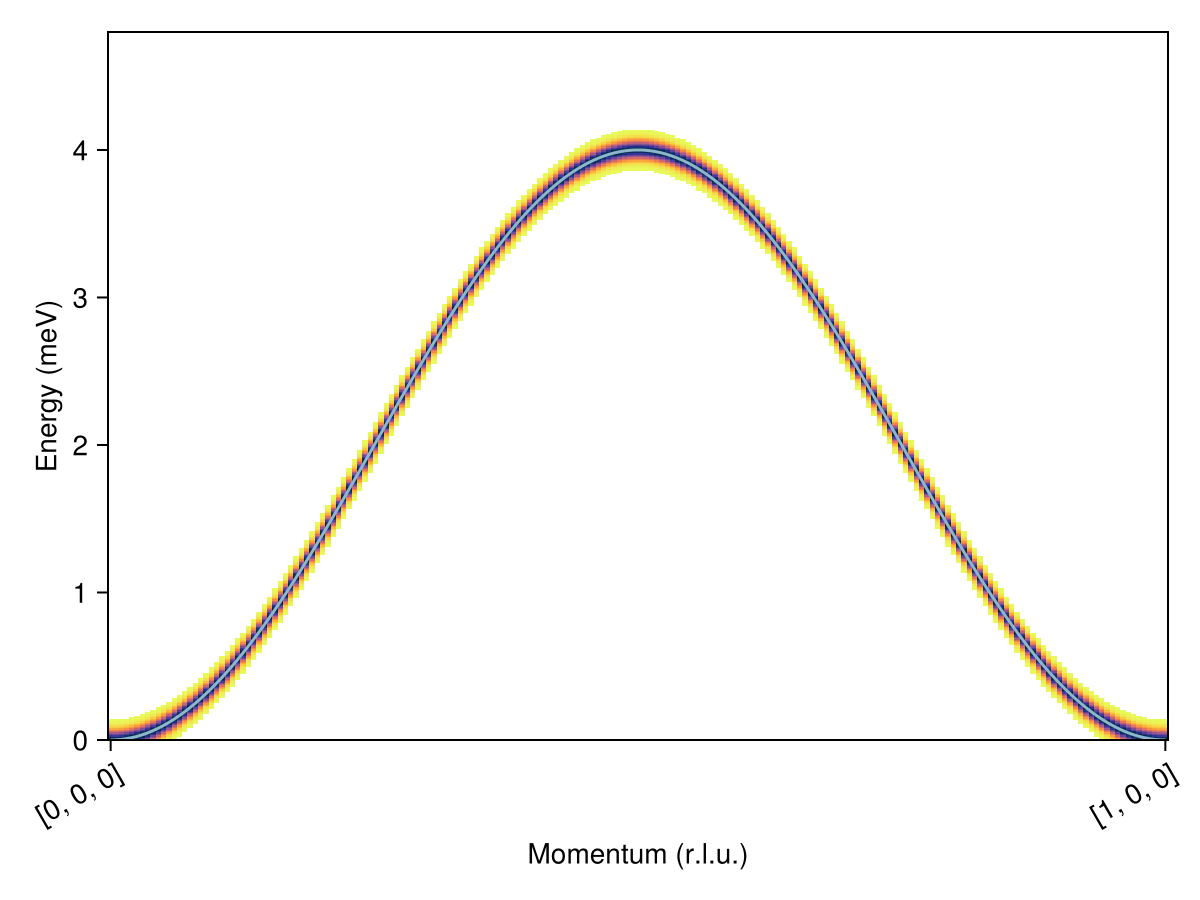

In [19]:
swt=SpinWaveTheory(sys; measure=ssf_perp(sys))
q_points = [[0,0,0], [1,0,0]]
density = 200
path = q_space_path(cryst, q_points, density);
res = intensities_bands(swt, path)

CairoMakie.activate!()
Sunny.BandIntensities{Float64}
plot_intensities(res; units)

Powder averaging

In [ ]:
radii = range(0, 2.5, 400) # (1/Å)
energies = range(0, 5, 400)
kernel = gaussian(fwhm=0.1)
res = powder_average(cryst, radii, 1600) do q_points
    intensities(swt, q_points; energies, kernel)
end
plot_intensities(res; units, colorrange=(0,5))